In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading datasets


In [178]:
#Paris 2024 datasets
paris2024_events = pd.read_csv("data/paris2024/events.csv")
paris2024_schedules = pd.read_csv("data/paris2024/schedules.csv")

In [179]:
#120 Years of olympics dataset
athlete_events = pd.read_csv("data/olympics120years/athlete_events.csv")
noc_regions = pd.read_csv("data/olympics120years/noc_regions.csv") #list of countries and their regions
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [180]:
#Tokyo 2021 datasets
df_athletes = pd.read_excel("data/tokyo2021/Athletes.xlsx")
df_coaches = pd.read_excel("data/tokyo2021/Coaches.xlsx")
df_entries_gender = pd.read_excel("data/tokyo2021/EntriesGender.xlsx")
df_medals = pd.read_excel("data/tokyo2021/Medals.xlsx")
df_teams = pd.read_excel("data/tokyo2021/Teams.xlsx")

c:\Users\davie\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\davie\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


### Cleaning and merging 120 years olympic dataset

The goal is to create a dataset that looks like this. So the Tokyo dataset and the 120 years of olympics dataset have columns in common that we can concatenate together later and use this dataset to predict with machine learning models how the next olympics in Paris will look like!
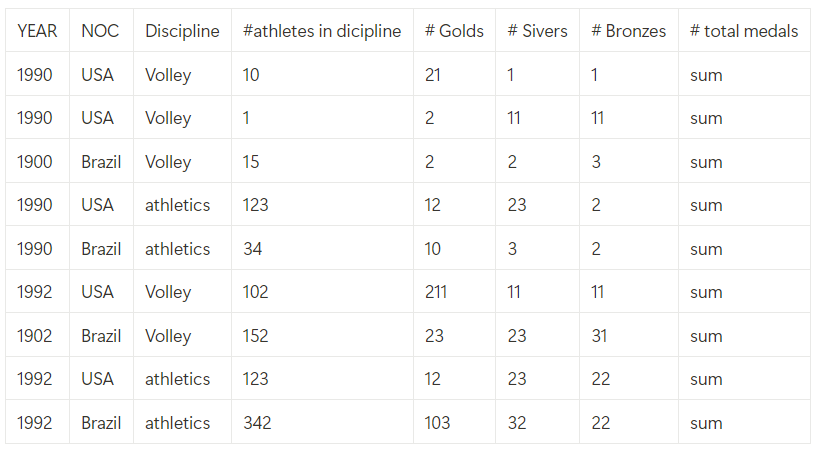

Merging the NOC regions to get the countries with their NOC code

In [181]:
merged_120 = pd.merge(athlete_events, noc_regions, how='left',on='NOC')
merged_120.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


Identifying nulls to clean


In [182]:
print(len(merged_120))
merged_120.isna().sum()

271116


ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [183]:
nocs_with_null_region = merged_120[merged_120["region"].isnull()]["NOC"]
print(nocs_with_null_region.value_counts())

NOC
SGP    349
ROT     12
TUV      7
UNK      2
Name: count, dtype: int64


In [184]:
#Show all of the rows with null regions that have won a medal
merged_120[(merged_120["region"].isnull()) & (merged_120["Medal"].notna())]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
67723,34619,Feng Tian Wei,F,21.0,163.0,55.0,Singapore,SGP,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Women's Team,Silver,NaN,NaN
67724,34619,Feng Tian Wei,F,25.0,163.0,55.0,Singapore,SGP,2012 Summer,2012,Summer,London,Table Tennis,Table Tennis Women's Singles,Bronze,NaN,NaN
67725,34619,Feng Tian Wei,F,25.0,163.0,55.0,Singapore,SGP,2012 Summer,2012,Summer,London,Table Tennis,Table Tennis Women's Team,Bronze,NaN,NaN
138095,69392,Li Jia Wei,F,26.0,170.0,60.0,Singapore,SGP,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Women's Team,Silver,NaN,NaN
138096,69392,Li Jia Wei,F,30.0,170.0,60.0,Singapore,SGP,2012 Summer,2012,Summer,London,Table Tennis,Table Tennis Women's Team,Bronze,NaN,NaN
213955,107436,Joseph Isaac Schooling,M,21.0,184.0,74.0,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,Gold,NaN,NaN
235908,118289,"Howe Liang ""Tiger"" Tan",M,27.0,160.0,69.5,Singapore,SGP,1960 Summer,1960,Summer,Roma,Weightlifting,Weightlifting Men's Lightweight,Silver,NaN,NaN
256622,128496,Wang Jue Gu,F,28.0,155.0,63.0,Singapore,SGP,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Women's Team,Silver,NaN,NaN
256624,128496,Wang Jue Gu,F,32.0,155.0,63.0,Singapore,SGP,2012 Summer,2012,Summer,London,Table Tennis,Table Tennis Women's Team,Bronze,NaN,NaN


Singapore represents almost all of the rows that have a NaN NOC value and off all of the missing NOCs with medals Singapore has all of them. So ill fill the missing NOC values with singapore

In [185]:

merged_120["region"].fillna(value="Singapore",inplace=True)

C:\Users\davie\AppData\Local\Temp\ipykernel_18900\1307280088.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_120["region"].fillna(value="Singapore",inplace=True)


I'll fill the missing values of weight, age and height with the mean

In [186]:
merged_120['Age'].fillna(value=merged_120['Age'].mean(),inplace=True)
merged_120['Weight'].fillna(value=merged_120['Weight'].mean(),inplace=True)
merged_120['Height'].fillna(value=merged_120['Height'].mean(),inplace=True)

C:\Users\davie\AppData\Local\Temp\ipykernel_18900\2388956258.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_120['Age'].fillna(value=merged_120['Age'].mean(),inplace=True)
C:\Users\davie\AppData\Local\Temp\ipykernel_18900\2388956258.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [187]:
merged_120["Medal"].fillna(value="None",inplace=True) #fill the nan medals with none just so its more readable

C:\Users\davie\AppData\Local\Temp\ipykernel_18900\747718346.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_120["Medal"].fillna(value="None",inplace=True) #fill the nan medals with none just so its more readable


I'll also drop the notes column

In [188]:
merged_120.drop(["notes"],axis=1,inplace=True)

In [189]:
merged_120.isna().sum() #to check if the nulls are gone

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

Eliminate any duplicated fields

In [190]:
merged_120.duplicated().sum()

1385

In [191]:
merged_120.drop_duplicates(keep='first',inplace=True)
merged_120.duplicated().sum()

0

### Data analysis - Olympics 120


In [192]:
merged_120[(merged_120["Medal"] == "Gold") & (merged_120["region"] == "USA")].value_counts().sum()

2638

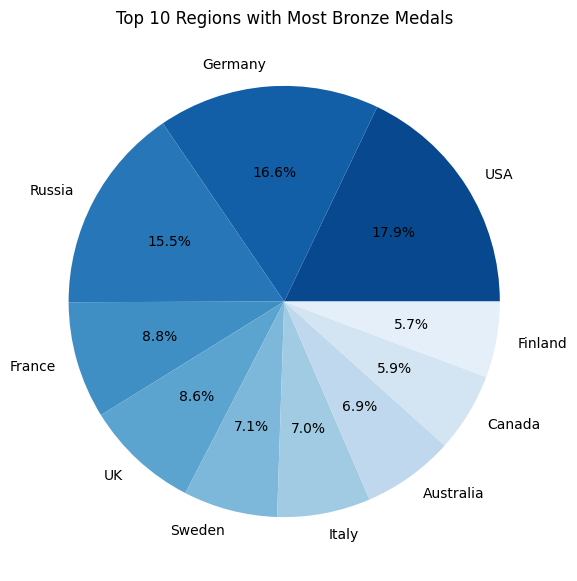

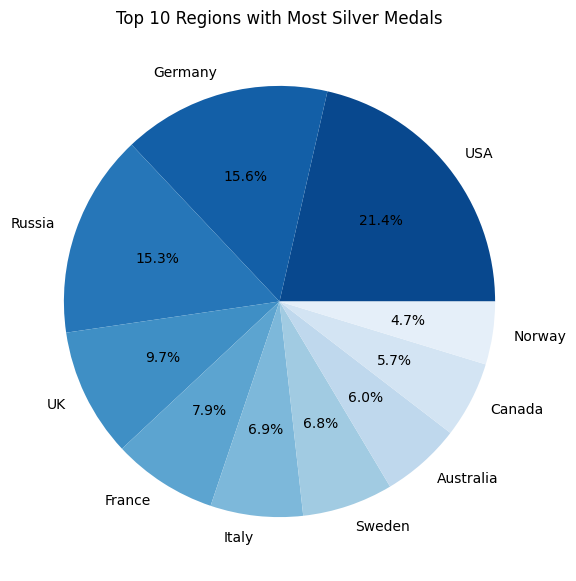

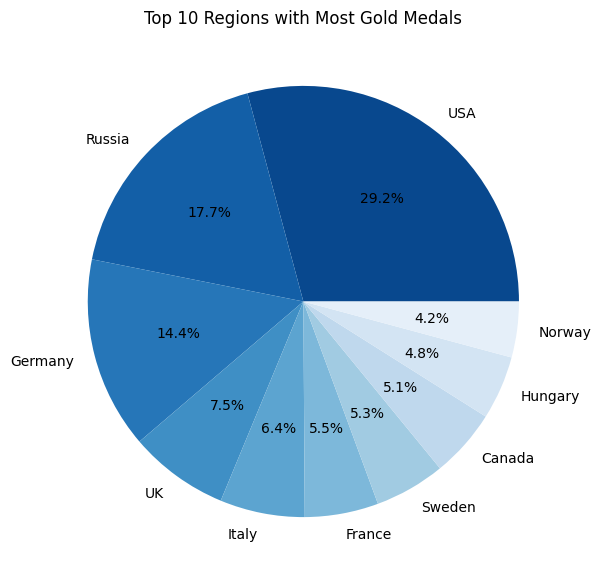

In [193]:
medals = ["Bronze", "Silver", "Gold"]
for i in medals:
    top10_most_medals = merged_120[(merged_120["Medal"] == i)].groupby("region").count().sort_values(by="Medal",ascending=False).reset_index().head(10)
    # Define a color palette
    colors = sns.color_palette('Blues', len(top10_most_medals))[::-1]

    # Create the pie chart with the color palette
    plt.figure(figsize=(10, 7))
    plt.pie(top10_most_medals['Medal'], labels=top10_most_medals['region'], autopct='%1.1f%%', colors=colors)
    plt.title('Top 10 Regions with Most ' + i + ' Medals')
    plt.show()

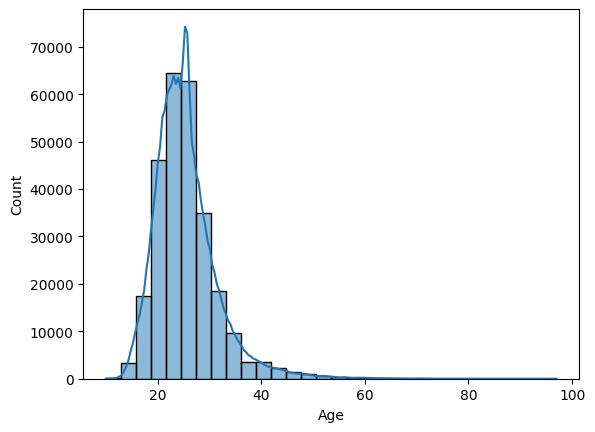

In [194]:
athlete_ages = merged_120["Age"]
sns.histplot(data=athlete_ages, bins=30, kde=True)
plt.show()

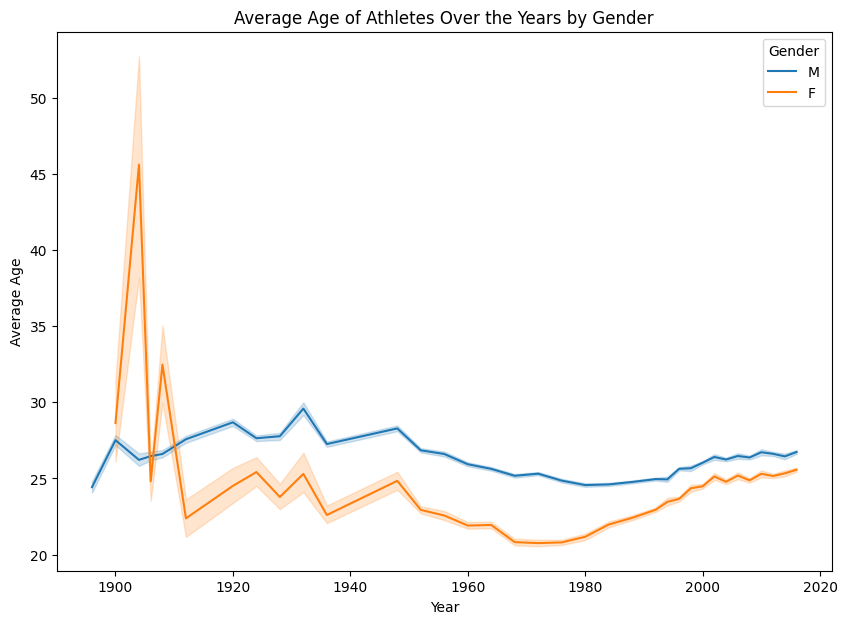

In [195]:
# Create line plot for both men and women
women = merged_120[merged_120["Sex"] == "F"]
men = merged_120[merged_120["Sex"] == "M"]
plt.figure(figsize=(10, 7))
sns.lineplot(data=merged_120, x="Year", y="Age", hue="Sex")
plt.title('Average Age of Athletes Over the Years by Gender')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.legend(title='Gender')
plt.show()

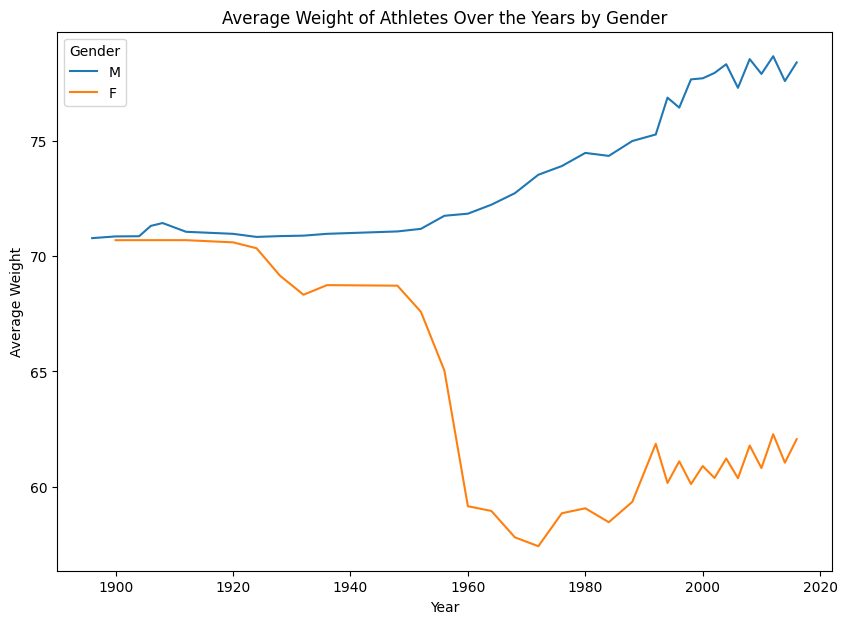

In [196]:
# Create line plot for both men and women
# Calculate mean weight for each year and gender
mean_weight = merged_120.groupby(['Year', 'Sex'])['Weight'].mean().reset_index()

# Create line plot for mean weight over the years by gender
plt.figure(figsize=(10, 7))
sns.lineplot(data=mean_weight, x='Year', y='Weight', hue='Sex')
plt.title('Average Weight of Athletes Over the Years by Gender')
plt.xlabel('Year')
plt.ylabel('Average Weight')
plt.legend(title='Gender')
plt.show()

## Merging and cleaning the 120years dataset
So after cleaning we are going to begin to merge and group our dataset so it is on the desired format I showed earlier.

In [197]:
# Group by the specified columns and aggregate
grouped_120 = merged_120.groupby(['Year', 'NOC', 'Sport', 'Sex']).agg(
    athletes=('ID', 'count'),
    Golds=('Medal', lambda x: (x == 'Gold').sum()),
    Silvers=('Medal', lambda x: (x == 'Silver').sum()),
    Bronzes=('Medal', lambda x: (x == 'Bronze').sum())
).reset_index()

# Calculate total medals
grouped_120['total_medals'] = grouped_120['Golds'] + grouped_120['Silvers'] + grouped_120['Bronzes']

# Rename columns to match the desired output
grouped_120.rename(columns={'Sport': 'Discipline', 'athletes': 'athletes_in_discipline', 
                            'Golds': 'Golds', 'Silvers': 'Silvers', 'Bronzes': 'Bronzes', 
                            'total_medals': 'total_medals'}, inplace=True)

grouped_120 = grouped_120.drop(columns=["Sex"])
# Sort by year and NOC for better readability
grouped_120.sort_values(by=['Year', 'NOC', 'Discipline'], inplace=True)

grouped_120.head(20)

,Year,NOC,Discipline,athletes_in_discipline,Golds,Silvers,Bronzes,total_medals
0,1896,AUS,Athletics,3,2,0,0,2
1,1896,AUS,Tennis,2,0,0,1,1
2,1896,AUT,Cycling,4,1,0,2,3
3,1896,AUT,Fencing,1,0,0,0,0
4,1896,AUT,Swimming,3,1,1,0,2
5,1896,DEN,Athletics,4,0,0,0,0
6,1896,DEN,Fencing,1,0,0,1,1
7,1896,DEN,Gymnastics,1,0,0,0,0
8,1896,DEN,Shooting,7,0,1,2,3
9,1896,DEN,Weightlifting,2,1,1,0,2


In [198]:
# filter the data just to see if gender is still separated
grouped_120[(grouped_120["Discipline"] == "Athletics") & (grouped_120["NOC"] == "GBR") & (grouped_120["Year"] > 1990)].head()

,Year,NOC,Discipline,athletes_in_discipline,Golds,Silvers,Bronzes,total_medals
16507,1992,GBR,Athletics,43,1,0,4,5
16508,1992,GBR,Athletics,62,1,0,8,9
19169,1996,GBR,Athletics,38,0,0,1,1
19170,1996,GBR,Athletics,55,0,9,1,10
21950,2000,GBR,Athletics,38,1,0,2,3


we can see that the number of athletes in each discipline is still separated by gender (since i removed the sex column). I will sum the number of athletes in each discipline all together to get all of the athletes in one discipline.

In [199]:
# Group by the first 3 columns and sum the values
grouped_120 = grouped_120.groupby(['Year', 'NOC', 'Discipline']).agg(
    athletes_in_discipline=('athletes_in_discipline', 'sum'),
    Golds=('Golds', 'sum'),
    Silvers=('Silvers', 'sum'),
    Bronzes=('Bronzes', 'sum'),
    total_medals=('total_medals', 'sum')
).reset_index()

grouped_120[(grouped_120["Discipline"] == "Athletics") & (grouped_120["NOC"] == "GBR") & (grouped_120["Year"] > 1990)].head()

,Year,NOC,Discipline,athletes_in_discipline,Golds,Silvers,Bronzes,total_medals
13289,1992,GBR,Athletics,105,2,0,12,14
15160,1996,GBR,Athletics,93,0,9,2,11
17079,2000,GBR,Athletics,88,2,2,2,6
19096,2004,GBR,Athletics,67,6,0,1,7
21165,2008,GBR,Athletics,71,1,2,5,8


Since this dataset contains both winter and summer we will eliminate the years where winter olympics were held, this includes a few years where the winter olympics were held at the same year as summer olympics but we will get better results on our model that way. I found a list of the years of the winter games in wikipedia. I used the "get from web" functionality of Microsoft Excel to get the full wikipedia table automatically

In [200]:
winter_games_years = pd.read_csv("data/winter_games_years.csv")
winter_games_years["Year"].describe()

count      29.000000
mean     1979.241379
std        33.232573
min      1924.000000
25%      1952.000000
50%      1980.000000
75%      2006.000000
max      2034.000000
Name: Year, dtype: float64

In [201]:
#Eliminate years after 2024
winter_games_years = winter_games_years[winter_games_years["Year"] <= 2024]
winter_games_years["Year"].describe()

count      26.000000
mean     1973.384615
std        29.846376
min      1924.000000
25%      1949.000000
50%      1974.000000
75%      1997.000000
max      2022.000000
Name: Year, dtype: float64

In [202]:
#Eliminate the winter years from the olympics 120 dataset
grouped_120 = grouped_120[~grouped_120['Year'].isin(winter_games_years['Year'])]

In [203]:
#check if the winter years have been eliminated
print(len(grouped_120))
grouped_120[grouped_120["Year"].isin(winter_games_years['Year'])].value_counts().sum()

11170


0

Now lets see which disciplines are not in the modern olympics (Tokyo 2021). The following code gathers the exact names of sports that were not in the 2021 olympics, so we will have to filter some of the results since some sports still exist but have been separated in categories. For example what before was only Gymnastics now is 3 categories (Artistic Gymnastics,Rhythmic Gymnastics,Trampoline Gymnastics).

In [204]:
discontinued_disciplines = grouped_120[~grouped_120['Discipline'].isin(df_entries_gender['Discipline'])]
print(discontinued_disciplines['Discipline'].unique())

['Cycling' 'Gymnastics' 'Equestrianism' 'Tug-Of-War' 'Basque Pelota'
 'Cricket' 'Croquet' 'Polo' 'Rugby' 'Lacrosse' 'Roque' 'Figure Skating'
 'Motorboating' 'Jeu De Paume' 'Racquets' 'Art Competitions' 'Ice Hockey'
 'Canoeing' 'Baseball' 'Softball' 'Synchronized Swimming' 'Trampolining']


From the list above we filter only the sports which have actually been discontinued. The renamed and divided ones like gymnastics we will keep them. I filtered through each one mannually with a list that i found on wikipedia of discontinued sports
Also we can filter out winter sports from the previous winter olympics.

In [205]:
discontinued_disciplines = ['Tug-Of-War', 'Basque Pelota',
    'Cricket', 'Croquet', 'Polo', 'Lacrosse', 'Roque','Motorboating', 
    'Jeu De Paume', 'Racquets', 'Art Competitions', 'Ice Hockey']

In [206]:
df_athletes["Discipline"].unique()

array(['Cycling Road', 'Artistic Gymnastics', 'Rowing', 'Basketball',
       'Handball', 'Swimming', 'Karate', 'Wrestling',
       'Rhythmic Gymnastics', 'Baseball/Softball', 'Athletics',
       'Artistic Swimming', 'Judo', 'Shooting', 'Table Tennis',
       'Football', 'Taekwondo', 'Fencing', 'Badminton', 'Boxing',
       'Weightlifting', 'Archery', 'Diving', 'Beach Volleyball',
       'Sailing', 'Hockey', 'Trampoline Gymnastics', 'Marathon Swimming',
       'Triathlon', 'Canoe Slalom', 'Water Polo', 'Surfing',
       'Canoe Sprint', 'Cycling BMX Racing', 'Rugby Sevens', 'Volleyball',
       'Equestrian', 'Tennis', 'Cycling Track', 'Golf', 'Skateboarding',
       'Modern Pentathlon', 'Cycling Mountain Bike', '3x3 Basketball',
       'Cycling BMX Freestyle', 'Sport Climbing'], dtype=object)

In [207]:
#Eliminate the discontinued disciplines from the olympics 120 dataset
grouped_120 = grouped_120[~grouped_120['Discipline'].isin(discontinued_disciplines)]

In [208]:
#check if the discontinued disciplines have been eliminated
print(len(grouped_120))
grouped_120[grouped_120["Discipline"].isin(discontinued_disciplines)].value_counts().sum()

11101


0

Now before we merge the Tokyo datasets with the Olympics 120 dataset we need to transform the NOC column since in the tokyo dataset it has the actual names of the countries like "France" and in the Olympics 120 it has only the short 3 letter name "FRA". 
Also, some of the NOCs were discontinued, so if they appear we have to eliminate those. Again I scraped a table from wikipedia using Excel.

In [209]:
discontinued_nocs = pd.read_csv("data/discontinued_nocs.csv")
print(discontinued_nocs.columns)
discontinued_nocs = discontinued_nocs.rename(columns={'Code': 'NOC'})
print(discontinued_nocs.columns)

Index(['Code'], dtype='object')
Index(['NOC'], dtype='object')


In [210]:
import pandas as pd

# Specify the path to your CSV file
file_path = 'data/current_nocs_2024.csv'
col_widths = [3, 35]
current_nocs = pd.read_fwf(file_path, widths=col_widths, header=None, names=['NOC', 'name'])
print(current_nocs.columns)
current_nocs.head()

Index(['NOC', 'name'], dtype='object')


,NOC,name
0,Cod,e;National Olympic Committee
1,AFG,;Afghanistan
2,ALB,;Albania
3,ALG,;Algeria
4,AND,;Andorra


In [211]:
current_nocs["name"] = current_nocs['name'].str[1:]
current_nocs = current_nocs[1:]
current_nocs.head()

,NOC,name
1,AFG,Afghanistan
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra
5,ANG,Angola


In [212]:
#Eliminate the discontinued NOCs from the olympics 120 dataset
grouped_120 = grouped_120[~grouped_120['NOC'].isin(discontinued_nocs)]
print(len(grouped_120))

11101


In [213]:
#merge name columns so then we can substitute NOC with name
grouped_120 = grouped_120.merge(current_nocs, on='NOC', how='left')
print(len(grouped_120))
grouped_120.head()

11101


,Year,NOC,Discipline,athletes_in_discipline,Golds,Silvers,Bronzes,total_medals,name
0,1896,AUS,Athletics,3,2,0,0,2,Australia
1,1896,AUS,Tennis,2,0,0,1,1,Australia
2,1896,AUT,Cycling,4,1,0,2,3,Austria
3,1896,AUT,Fencing,1,0,0,0,0,Austria
4,1896,AUT,Swimming,3,1,1,0,2,Austria


In [214]:
#Make the NOC column the same format as the Tokyo dataset
grouped_120 = grouped_120.drop(columns=['NOC'])
grouped_120 = grouped_120.rename(columns={'name': 'NOC'})
grouped_120.head()

,Year,Discipline,athletes_in_discipline,Golds,Silvers,Bronzes,total_medals,NOC
0,1896,Athletics,3,2,0,0,2,Australia
1,1896,Tennis,2,0,0,1,1,Australia
2,1896,Cycling,4,1,0,2,3,Austria
3,1896,Fencing,1,0,0,0,0,Austria
4,1896,Swimming,3,1,1,0,2,Austria


In [215]:
#reorder columns
desired_columns = ['Year', 'NOC', 'Discipline', 'athletes_in_discipline', 'Golds', 'Silvers', 'Bronzes', 'total_medals']
grouped_120 = grouped_120[desired_columns]
grouped_120.head()

,Year,NOC,Discipline,athletes_in_discipline,Golds,Silvers,Bronzes,total_medals
0,1896,Australia,Athletics,3,2,0,0,2
1,1896,Australia,Tennis,2,0,0,1,1
2,1896,Austria,Cycling,4,1,0,2,3
3,1896,Austria,Fencing,1,0,0,0,0
4,1896,Austria,Swimming,3,1,1,0,2


## Merging Tokyo 2021 datasets to make test set
The plan is simple, I will use the data from the last 120 years of olympics to predict the results of tokyo 2021. Then we will see how accurate are the predictions by comparing them with the actual Tokyo 2021 results. First i need to prepare the dataset so it is in the same format as the 120 dataset.

This is how the format of the 120 years of olympics dataset looks so far

In [216]:
grouped_120.head()

,Year,NOC,Discipline,athletes_in_discipline,Golds,Silvers,Bronzes,total_medals
0,1896,Australia,Athletics,3,2,0,0,2
1,1896,Australia,Tennis,2,0,0,1,1
2,1896,Austria,Cycling,4,1,0,2,3
3,1896,Austria,Fencing,1,0,0,0,0
4,1896,Austria,Swimming,3,1,1,0,2


In [217]:
athlete_counts = df_athletes.groupby(['NOC', 'Discipline']).size().reset_index(name='athletes_in_discipline')
athlete_counts.head()

,NOC,Discipline,athletes_in_discipline
0,Afghanistan,Athletics,2
1,Afghanistan,Shooting,1
2,Afghanistan,Swimming,1
3,Afghanistan,Taekwondo,1
4,Albania,Artistic Gymnastics,1


In [218]:
#adding the year column for the 2021 Tokyo olympics
athlete_counts["Year"] = 2021
athlete_counts.head()

,NOC,Discipline,athletes_in_discipline,Year
0,Afghanistan,Athletics,2,2021
1,Afghanistan,Shooting,1,2021
2,Afghanistan,Swimming,1,2021
3,Afghanistan,Taekwondo,1,2021
4,Albania,Artistic Gymnastics,1,2021


In [219]:
#reorder the columns so they are in the same order as the the 120 dataset
athlete_counts = athlete_counts[desired_columns[0:4]]
athlete_counts.head()

,Year,NOC,Discipline,athletes_in_discipline
0,2021,Afghanistan,Athletics,2
1,2021,Afghanistan,Shooting,1
2,2021,Afghanistan,Swimming,1
3,2021,Afghanistan,Taekwondo,1
4,2021,Albania,Artistic Gymnastics,1


Now I can train a model and predict things like the number of athletes in a discipline, number of medals, etc.

## Model selection and training

In [220]:
#See how many object categories we have to encode
grouped_120.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11101 entries, 0 to 11100
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year                    11101 non-null  int64 
 1   NOC                     10958 non-null  object
 2   Discipline              11101 non-null  object
 3   athletes_in_discipline  11101 non-null  int64 
 4   Golds                   11101 non-null  int64 
 5   Silvers                 11101 non-null  int64 
 6   Bronzes                 11101 non-null  int64 
 7   total_medals            11101 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 693.9+ KB


In [221]:
grouped_120 = grouped_120.dropna() #drop any 

In [222]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin, BaseEstimator

class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.label_encoder = LabelEncoder()
        self.classes_ = None

    def fit(self, X):
        self.label_encoder.fit(X)
        self.classes_ = set(self.label_encoder.classes_)
        return self

    def transform(self, X):
        return np.array([self.label_encoder.transform([x])[0] if x in self.classes_ else -1 for x in X])

# Use the custom encoder
preprocessed_data = grouped_120.copy()
custom_label_encoder = CustomLabelEncoder()

# Apply custom label encoder to the 'NOC' and 'Discipline' columns
preprocessed_data['NOC'] = custom_label_encoder.fit_transform(preprocessed_data['NOC'])
preprocessed_data['Discipline'] = custom_label_encoder.fit_transform(preprocessed_data['Discipline'])

preprocessed_data.head()


,Year,NOC,Discipline,athletes_in_discipline,Golds,Silvers,Bronzes,total_medals
0,1896,10,1,3,2,0,0,2
1,1896,10,31,2,0,0,1,1
2,1896,11,8,4,1,0,2,3
3,1896,11,11,1,0,0,0,0
4,1896,11,27,3,1,1,0,2


In [223]:
corr_matrix = preprocessed_data.corr(numeric_only=True)
corr_matrix["total_medals"].sort_values(ascending=False)

total_medals              1.000000
Golds                     0.762441
Silvers                   0.724024
Bronzes                   0.673184
athletes_in_discipline    0.618914
NOC                       0.025696
Discipline               -0.022493
Year                     -0.212174
Name: total_medals, dtype: float64

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
df_numpy = preprocessed_data.to_numpy()

def train_and_predict(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    return y_pred

In [225]:
#Predict total_medals
x = df_numpy[:, [0,1,2,3]]
y_total_medals = df_numpy[:, -1]	
y_pred = train_and_predict(x, y_total_medals)

Accuracy: 0.74


In [226]:
#Predict number of bronzes
y_bronzes = df_numpy[:, -2]	
y_pred = train_and_predict(x, y_bronzes)

Accuracy: 0.84


In [227]:
#Predict number of silvers
y_silvers = df_numpy[:, -3]	
y_pred = train_and_predict(x, y_silvers)

Accuracy: 0.86


In [228]:
#Predict number of golds
y_golds = df_numpy[:, -4]	
y_pred_ = train_and_predict(x, y_golds)

Accuracy: 0.89


In [229]:
# Create DataFrames for each array
df_x = pd.DataFrame(x, columns=['Year', 'NOC', 'Discipline', 'athletes_in_discipline'])
df_y_golds = pd.DataFrame(y_golds, columns=['Golds'])
df_y_silvers = pd.DataFrame(y_silvers, columns=['Silvers'])
df_y_bronzes = pd.DataFrame(y_bronzes, columns=['Bronzes'])
df_y_total_medals = pd.DataFrame(y_total_medals, columns=['TotalMedals'])

# Concatenate the DataFrames horizontally
df_predicted = pd.concat([df_x, df_y_golds, df_y_silvers, df_y_bronzes, df_y_total_medals], axis=1)

df_predicted.head()

,Year,NOC,Discipline,athletes_in_discipline,Golds,Silvers,Bronzes,TotalMedals
0,1896,10,1,3,2,0,0,2
1,1896,10,31,2,0,0,1,1
2,1896,11,8,4,1,0,2,3
3,1896,11,11,1,0,0,0,0
4,1896,11,27,3,1,1,0,2


## Predictions on the tokyo 2021 dataset

In [230]:
# For the test data
athlete_counts['NOC'] = custom_label_encoder.transform(athlete_counts['NOC'])
athlete_counts['Discipline'] = custom_label_encoder.transform(athlete_counts['Discipline'])
athlete_counts.head()

,Year,NOC,Discipline,athletes_in_discipline
0,2021,-1,1,2
1,2021,-1,25,1
2,2021,-1,27,1
3,2021,-1,30,1
4,2021,-1,-1,1


In [231]:
x_train_number_medals = df_numpy[:, [0,1,2,3]]
y_train_number_medals = df_numpy[:,-1]
x_test_number_medals = athlete_counts.to_numpy()
print(x_train_number_medals.shape)
print(y_train_number_medals.shape)

(10958, 4)
(10958,)


In [232]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train_number_medals, y_train_number_medals)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [233]:
predictions = clf.predict(x_test_number_medals)
predictions.reshape(-1,1)


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [234]:
x_test_number_medals["total_medals"] = predictions
x_test_number_medals.head()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
grouped_120 = grouped_120.dropna()

In [ ]:
from sklearn.metrics import accuracy_score
# Assuming y_true and y_pred are your true labels and predicted labels respectively
accuracy = accuracy_score(y_test, predictions)
print(accuracy)


0.9680173465239192


## Analyzing the Paris 2024 olympics dataset


In [ ]:
paris2024_events.head()

,event,tag,sport,sport_code,sport_url
0,Men's Individual,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery
1,Women's Individual,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery
2,Men's Team,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery
3,Women's Team,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery
4,Mixed Team,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery


In [ ]:
paris2024_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event       329 non-null    object
 1   tag         329 non-null    object
 2   sport       329 non-null    object
 3   sport_code  329 non-null    object
 4   sport_url   329 non-null    object
dtypes: object(5)
memory usage: 13.0+ KB


Analyze how many events and sports are there

In [ ]:
print("Number of sports paris 2024: ", paris2024_events["sport"].nunique())
print("Number of events paris 2024: ", paris2024_events["event"].nunique())

Number of sports paris 2024:  45
Number of events paris 2024:  288


## Conclusions
In the end I didn't have enough time to actually predict the results for the 2024 olympics. I've made a bunch of mistakes that made me lose a lot of time. Here is what I've learned in this hackathon, my first one:
- Don't choose a dataset that is too hard to work with (I couldn't merge the train set with the Tokyo dataset).
- More planning, see if something is really feasable in the timeframe of the hackathon.
- Don't overcomplicate things. 
- Focus on core features and what is specifically asked in the rubric.